In [2]:
import pandas as pd
import os
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [3]:
#file_1 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2001.csv'
#file_2 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2002.csv'
#file_3 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2003.csv'
#file_4 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2004.csv'
#file_5 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2005.csv'
file_6 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2006.csv'
file_7 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2007.csv'
file_8 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2008.csv'
file_9 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2009.csv'
file_10 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2010.csv'
file_11 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2011.csv'
file_12 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2012.csv'
file_13 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2013.csv'
file_14 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2014.csv'
file_15 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2015.csv'
file_16 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2016.csv'
file_17 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2017.csv'
file_18 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2018.csv'
file_19 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2019.csv'
file_20 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2020.csv'
file_21 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2021.csv'
file_22 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2022.csv'
file_23 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2023.csv'
file_24 = '/Users/evelynli/Documents/Work/ASL/Treasury Yield Rate/daily-treasury-rates-2024.csv'


In [7]:
df = pd.read_csv(file_6)
#df = pd.concat([df, pd.read_csv(file_2)], ignore_index=True)
#df = pd.concat([df, pd.read_csv(file_3)], ignore_index=True)
#df = pd.concat([df, pd.read_csv(file_4)], ignore_index=True)
#df = pd.concat([df, pd.read_csv(file_5)], ignore_index=True)
#df = pd.concat([df, pd.read_csv(file_6)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_7)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_8)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_9)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_10)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_11)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_12)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_13)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_14)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_15)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_16)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_17)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_18)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_19)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_20)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_21)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_22)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_23)], ignore_index=True)
df = pd.concat([df, pd.read_csv(file_24)], ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df = df.drop(columns=['4 Mo', '2 Mo'])
new_column_names = ['Date', '1', '3', '6', '12', '24', '36', '60', '84', '120', '240', '360']
df.columns = new_column_names
df.set_index('Date', inplace=True)
friday_df = df[df.index.dayofweek == 4]
df.dropna(inplace=True)
df.to_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/ETF/processed data/daily-treasury-rates.csv')
friday_df.to_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/ETF/processed data/weekly-treasury-rates.csv')

In [8]:
df

,1,3,6,12,24,36,60,84,120,240,360
Date,,,,,,,,,,,
2006-02-09,4.32,4.52,4.67,4.66,4.66,4.62,4.55,4.55,4.54,4.72,4.51
2006-02-10,4.36,4.53,4.70,4.70,4.69,4.67,4.59,4.59,4.59,4.76,4.55
2006-02-13,4.38,4.55,4.71,4.70,4.68,4.66,4.58,4.58,4.58,4.76,4.56
2006-02-14,4.42,4.55,4.72,4.71,4.69,4.68,4.61,4.61,4.62,4.80,4.60
2006-02-15,4.39,4.55,4.70,4.70,4.71,4.68,4.60,4.60,4.61,4.78,4.58
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06,5.50,5.34,5.00,4.46,3.99,3.76,3.73,3.79,3.90,4.28,4.18
2024-08-07,5.50,5.34,4.99,4.45,4.00,3.81,3.79,3.85,3.96,4.35,4.26
2024-08-08,5.55,5.34,5.01,4.48,4.04,3.86,3.83,3.89,3.99,4.38,4.28


In [18]:
yield_data = pd.read_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/ETF/processed data/daily-treasury-rates.csv', index_col=0, parse_dates=True)
def nelson_siegel(params, tau):
    beta0, beta1, beta2, lambda_ = params
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau))
    term3 = beta2 * (((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau)) - np.exp(-lambda_ * tau))
    return term1 + term2 + term3

# Objective function for optimization
def objective_function(params, yields, maturities):
    errors = yields - nelson_siegel(params, maturities)
    return np.sum(errors**2)


In [21]:
window_size = 30
maturities = np.array([1/12, 1/4, 1/2, 1, 2, 3, 5, 7, 10, 20, 30])  # Example maturities in years

results = []
predictions = []
dates = []

for i in range(window_size, len(yield_data) - 1):
    # Select the data within the rolling window
    window_data = yield_data.iloc[i - window_size:i]
    avg_yields = window_data.mean(axis=0).values
    
    # Initial guess for parameters [beta0, beta1, beta2, lambda]
    initial_params = [0.03, -0.02, 0.01, 0.5]
    
    # Minimize the objective function
    res = minimize(objective_function, initial_params, args=(avg_yields, maturities), method='Nelder-Mead')
    
    # Store the estimated parameters
    results.append(res.x)
    
    # Predict the next day's yield curve
    next_day_params = res.x
    next_day_yields = nelson_siegel(next_day_params, maturities)
    
    # Store the prediction
    predictions.append(next_day_yields)
    dates.append(yield_data.index[i + 1])

# Convert results and predictions to DataFrame
results_df = pd.DataFrame(results, columns=['Beta0', 'Beta1', 'Beta2', 'Lambda'], index=dates)
predictions_df = pd.DataFrame(predictions, columns=yield_data.columns, index=dates)


/var/folders/kk/4hst7jm10nj04j3404bsj2yr0000gn/T/ipykernel_2633/3318343870.py:5: RuntimeWarning: overflow encountered in exp
  term2 = beta1 * ((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau))
/var/folders/kk/4hst7jm10nj04j3404bsj2yr0000gn/T/ipykernel_2633/3318343870.py:6: RuntimeWarning: overflow encountered in exp
  term3 = beta2 * (((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau)) - np.exp(-lambda_ * tau))
/var/folders/kk/4hst7jm10nj04j3404bsj2yr0000gn/T/ipykernel_2633/3318343870.py:6: RuntimeWarning: invalid value encountered in subtract
  term3 = beta2 * (((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau)) - np.exp(-lambda_ * tau))
/var/folders/kk/4hst7jm10nj04j3404bsj2yr0000gn/T/ipykernel_2633/3318343870.py:12: RuntimeWarning: overflow encountered in square
  return np.sum(errors**2)
/var/folders/kk/4hst7jm10nj04j3404bsj2yr0000gn/T/ipykernel_2633/3318343870.py:6: RuntimeWarning: overflow encountered in multiply
  term3 = beta2 * (((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau)) - np.e

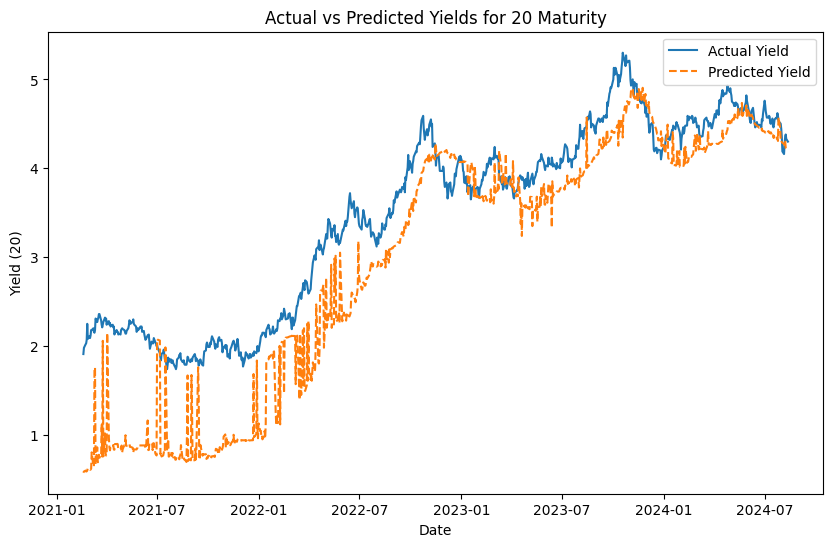

In [22]:
import matplotlib.pyplot as plt

# Example: Plot actual vs predicted yields for a specific maturity
maturity_index = 9  # Index for the 10-year column

plt.figure(figsize=(10, 6))
plt.plot(yield_data.index[window_size+1:], yield_data.iloc[window_size+1:, maturity_index], label='Actual Yield')
plt.plot(predictions_df.index, predictions_df.iloc[:, maturity_index], label='Predicted Yield', linestyle='--')
plt.xlabel('Date')
plt.ylabel(f'Yield ({yield_data.columns[maturity_index]})')
plt.title(f'Actual vs Predicted Yields for {yield_data.columns[maturity_index]} Maturity')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_yields = yield_data.iloc[window_size+1:, maturity_index]
predicted_yields = predictions_df.iloc[:, maturity_index]

mse = mean_squared_error(actual_yields, predicted_yields)
mae = mean_absolute_error(actual_yields, predicted_yields)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.5225450436634448
Mean Absolute Error: 0.5740865131968178


In [26]:
def NS_B(lambda_, tau):
    col1 = np.ones_like(tau)
    col2 = (1 - np.exp(-lambda_ * tau)) / (lambda_ * tau)
    col3 = col2 - np.exp(-lambda_ * tau)
    return np.column_stack((col1, col2, col3))

In [27]:
def AFNS_C(sigma, lambda_, tau):
    s = sigma
    A = s[0, 0] ** 2 + s[0, 1] ** 2 + s[0, 2] ** 2
    B = s[1, 0] ** 2 + s[1, 1] ** 2 + s[1, 2] ** 2
    C = s[2, 0] ** 2 + s[2, 1] ** 2 + s[2, 2] ** 2
    D = s[0, 0] * s[1, 0] + s[0, 1] * s[1, 1] + s[0, 2] * s[1, 2]
    E = s[0, 0] * s[2, 0] + s[0, 1] * s[2, 1] + s[0, 2] * s[2, 2]
    F = s[1, 0] * s[2, 0] + s[1, 1] * s[2, 1] + s[1, 2] * s[2, 2]

    t = tau
    la = lambda_
    r1 = -A * t ** 2 / 6
    r2 = -B * (1 / (2 * la ** 2) - (1 - np.exp(-la * t)) / (la ** 3 * t) + (1 - np.exp(-2 * la * t)) / (
                4 * la ** 3 * t))
    r3 = -C * (1 / (2 * la ** 2) + np.exp(-la * t) / (la ** 2) - t * np.exp(-2 * la * t) / (4 * la) -
               3 * np.exp(-2 * la * t) / (4 * la ** 2) - 2 * (1 - np.exp(-la * t)) / (la ** 3 * t) +
               5 * (1 - np.exp(-2 * la * t)) / (8 * la ** 3 * t))
    r4 = -D * (t / (2 * la) + np.exp(-la * t) / (la ** 2) - (1 - np.exp(-la * t)) / (la ** 3 * t))
    r5 = -E * (3 * np.exp(-la * t) / (la ** 2) + t / (2 * la) + t * np.exp(-la * t) / la -
               3 * (1 - np.exp(-la * t)) / (la ** 3 * t))
    r6 = -F * (1 / (la ** 2) + np.exp(-la * t) / (la ** 2) - np.exp(-2 * la * t) / (2 * la ** 2) -
               3 * (1 - np.exp(-la * t)) / (la ** 3 * t) + 3 * (1 - np.exp(-2 * la * t)) / (4 * la ** 3 * t))
    return r1 + r2 + r3 + r4 + r5 + r6


In [37]:
# Log-likelihood function
def log_likelihood(para, m_spot, v_mat, dt, nf, nobs):
    kappa = np.diag(para[:3])
    sigma = np.diag(para[3:6])
    theta = para[6:9]
    lambda_ = para[9]
    H = np.diag(para[10:10 + len(v_mat)]) 
    B = NS_B(lambda_, v_mat)
    C = AFNS_C(sigma, lambda_, v_mat)

    # Eigen decomposition for kappa
    evals, evecs = np.linalg.eig(kappa)

    Smat = np.linalg.inv(evecs) @ sigma @ sigma.T @ np.linalg.inv(evecs.T)

    Vdt = np.zeros((nf, nf))
    Vinf = np.zeros((nf, nf))
    for i in range(nf):
        for j in range(nf):
            Vdt[i, j] = Smat[i, j] * (1 - np.exp(-(evals[i] + evals[j]) * dt)) / (evals[i] + evals[j])
            Vinf[i, j] = Smat[i, j] / (evals[i] + evals[j])

    Q = evecs @ Vdt @ evecs.T
    Q0 = evecs @ Vinf @ evecs.T

    # Initialization
    prevX = theta
    prevV = Q0
    Phi1 = expm(-kappa * dt)
    Phi0 = (np.eye(nf) - Phi1) @ theta
    log_likelihood_val = 0
    
    X_estimate = np.zeros((nobs, nf))  # Store the estimated factors

    for i in range(nobs):
        Xhat = Phi0 + Phi1 @ prevX
        Vhat = Phi1 @ prevV @ Phi1.T + Q

        y = m_spot[i, :]  # Observed yield
        y_implied = B @ Xhat + C  # Implied yield from the model
        er = y - y_implied  # Prediction error

        # Kalman gain
        ev = B @ Vhat @ B.T + H
        
        # Regularize the ev matrix to avoid singularity
        ev += np.eye(len(ev)) * 1e-10

        # Calculate Kalman gain
        KG = Vhat @ B.T @ np.linalg.inv(ev)

        prevX = Xhat + KG @ er
        prevV = Vhat - KG @ B @ Vhat
        X_estimate[i, :] = prevX

        # Update log-likelihood
        log_likelihood_val += -0.5 * len(y) * np.log(2 * np.pi) - 0.5 * np.log(
            np.linalg.det(ev)) - 0.5 * er @ np.linalg.inv(ev) @ er

    return log_likelihood_val, X_estimate


In [30]:
def neg_log_likelihood(para, m_spot, v_mat, dt, nf, nobs):
    return -log_likelihood(para, m_spot, v_mat, dt, nf, nobs)[0]

In [32]:
yield_data = pd.read_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/ETF/processed data/daily-treasury-rates.csv', index_col=0, parse_dates=True)
v_mat = np.array([1/12, 1/4, 1/2, 1, 2, 3, 5, 7, 10, 20, 30])

In [35]:
nobs, nmat = yield_data.shape
dt = 1/252 
nf = 3 

init_para = np.array([
    1.226637, 0.840692, 0.603496,  # kappa
    0.006327, 0.003441, 0.010891, # sigma
    0.032577, -0.012536, -0.002748, # theta
    0.5,                             # lambda
] + [0.000524] * nmat)

bounds = [(0, None) if i  >= 9 or i in [3,4,5] else (None,None) for i in range(len(init_para))]

In [38]:
window_size = 120
results = []
predictions = []
dates = []

for i in range(window_size, len(yield_data) - 1):
    # 选择滚动窗口内的数据
    window_data = yield_data.iloc[i - window_size:i].to_numpy()
    
    # 进行优化
    opt_result = minimize(
        fun=neg_log_likelihood,
        x0=init_para,
        args=(window_data, v_mat, dt, nf, window_size),
        method='L-BFGS-B',
        bounds=bounds,
        options={'maxiter': 10**4, 'disp': False}
    )
    
    if opt_result.success:
        fitted_params = opt_result.x
        
        # 计算模型的预测收益率
        kappa = np.diag(fitted_params[:3])
        sigma = np.diag(fitted_params[3:6])
        theta = fitted_params[6:9]
        lambda_ = fitted_params[9]
        H = np.diag(fitted_params[10:10 + len(v_mat)])
        B = NS_B(lambda_, v_mat)
        C = AFNS_C(sigma, lambda_, v_mat)

        X = log_likelihood(fitted_params, window_data, v_mat, dt, nf, window_size)[1]

        next_day_yields = B @ X[-1, :].T + C
        predictions.append(next_day_yields)
        dates.append(yield_data.index[i + 1])

predictions_df = pd.DataFrame(predictions, columns=yield_data.columns, index=dates)
maturity_index = 9

/var/folders/kk/4hst7jm10nj04j3404bsj2yr0000gn/T/ipykernel_2633/1212796265.py:57: RuntimeWarning: invalid value encountered in log
  log_likelihood_val += -0.5 * len(y) * np.log(2 * np.pi) - 0.5 * np.log(


LinAlgError: Singular matrix